In [24]:
import json
import json as js
from pprint import pprint as pprint
import pandas as pd
import requests
import gmaps
import matplotlib.pyplot as plt
from config import gmapsapi
gmaps.configure(api_key=gmapsapi)

In [25]:
# year = 1980
# while year <= 2016:
#     year += 1
file = pd.read_csv(f"../almostfinishedaqidata_smile_/aqi_monthly_county/2005countyaqi.csv")
filedf = pd.DataFrame(file)
countynames = filedf["county Name"].unique()
#     filedf.to_csv(f"{year}_county_aqi.csv")

In [28]:
target_url = (f"https://maps.googleapis.com/maps/api/geocode/json?address=Albany")
geo_data = requests.get(target_url).json()
print(geo_data)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [27]:
latitude = []
longitude = []
for county in countynames:
    target_url = (f"https://maps.googleapis.com/maps/api/geocode/json?address={county}")
    geo_data = requests.get(target_url).json()
    print(geo_data)
#     try:
#         lat = geo_data["results"][0]["geometry"]["location"]["lat"]
#         latitude.append(lat)
#         lng = geo_data["results"][0]["geometry"]["location"]["lng"]
#         longitude.append(lng)
#     except IndexError:
#         latitude.append("whoops")
#         longitude.append("dope")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [ ]:
# county = "Albany"
# target_url = (f"https://maps.googleapis.com/maps/api/geocode/json?address={county}")
# geo_data = requests.get(target_url).json()
# geo_data["results"][0]["geometry"]["location"]["lat"]


In [ ]:
filedf["Latitude"] = latitude
filedf["Longitude"] = longitude

In [ ]:
filedf

In [ ]:
finaldf = filedf[filedf.Latitude != "whoops"]
final2df = finaldf[finaldf.Latitude > 25]
final3df = final2df[final2df.Longitude < -40]
final4df = final3df[final3df.Longitude > -140]
final5df = final4df[final4df.Latitude < 50]
# final5df.to_csv("2015_final_df.csv")
len(final5df)

In [58]:
coordinates = final5df[["Latitude", "Longitude"]].astype(float)
center = ["39.8283","-98.5795"]
figure_layout = {
    'width': '432px',
    'height': '288px',
    'border': '1px solid black',
    'padding': '1px'
}
fig = gmaps.figure(layout = figure_layout, zoom_level= 3, center = center)

In [59]:

heatmaplayer = gmaps.heatmap_layer(coordinates, weights = final5df["01"],
                                 max_intensity = final5df["01"].max(), point_radius = .1)
fig.add_layer(heatmaplayer)
fig

Figure(layout=FigureLayout(border='1px solid black', height='288px', padding='1px', width='432px'))

In [35]:
housing.plot(kind="scatter", x=finaldf["Longitude"], y=finaldf["latitude",
    s=finaldf['01'], label="AQI",
    c="median_house_value", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(10,7))
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-35-12c0f823b2af>, line 2)

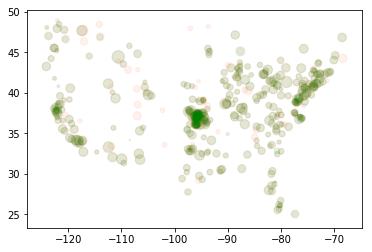

In [60]:
plt.scatter(y = final5df["Latitude"], x = final5df["Longitude"], s = final5df["12"], alpha = 0.1, c = "coral")
plt.scatter(y = final5df["Latitude"], x = final5df["Longitude"], s = final5df["01"], alpha = 0.1, c = "green")
# cax = plt.axes([0.85, 0.1, 0.075, 0.8])
# plt.colorbar(cax=cax)
plt.show()
# plt.savefig("2005aqi_map")

,county Name,01,02,03,04,05,06,07,08,09,10,11,12,Latitude,Longitude
0,Abbeville,27.518519,33.304348,33.322581,44.000000,36.684211,31.222222,42.500000,38.645161,31.565217,29.967742,28.766667,26.322581,29.9747,-92.1343
1,Ada,31.322581,32.750000,39.193548,42.033333,46.935484,54.666667,47.354839,63.354839,41.833333,48.129032,34.266667,32.161290,34.7726,-96.6806
2,Adair,35.903226,43.464286,40.935484,46.600000,44.129032,44.733333,45.870968,42.612903,44.433333,39.387097,31.166667,33.709677,36.4368,-95.2714
3,Adams,37.314050,33.589286,36.588710,36.370629,39.927632,41.726667,41.367742,48.303226,38.440000,29.961290,29.773109,28.157025,36.743,-95.9117
4,Adjuntas,12.800000,14.000000,14.125000,22.500000,37.571429,40.000000,31.428571,23.400000,24.000000,24.750000,22.000000,17.800000,18.1635,-66.7232
5,Aiken,NaN,31.600000,37.724138,38.566667,41.666667,37.233333,38.193548,37.551724,33.793103,32.709677,18.333333,NaN,33.5604,-81.7196
6,Alachua,32.387097,38.714286,38.516129,39.733333,41.451613,38.433333,40.064516,33.064516,29.133333,31.258065,28.900000,30.064516,29.7938,-82.4944
7,Alamance,32.677419,37.346154,27.096774,27.800000,38.636364,37.384615,NaN,NaN,NaN,NaN,NaN,NaN,36.0117,-79.4254
8,Alameda,71.870968,48.821429,46.451613,49.733333,45.322581,62.633333,45.580645,51.161290,57.133333,46.419355,46.533333,44.290323,37.7652,-122.242
9,Alamosa,17.322581,19.857143,20.903226,25.766667,14.000000,22.400000,16.419355,22.322581,19.666667,17.290323,17.466667,19.600000,37.4694,-105.87
